# 3F8 Logistic Regression Lab
#### *Submitted by Tom Lu xl402 on 1/17/2019*

In [1]:
import numpy as np
from python_code import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## EDA

In [2]:
# Load data, X is the input featire matrix, y is the one-hot encoded label
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')
print("X has shape: {}, y has shape: {}".format(X.shape, y.shape))

X has shape: (1000, 2), y has shape: (1000,)


**c) Using the given function *plot_data()*, the dataset is visualised in the two dimensional input space displaying each datapoint's class label**

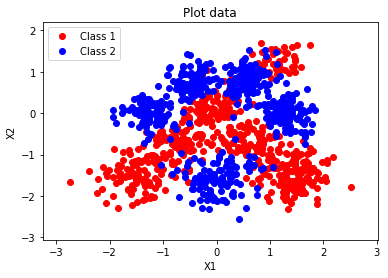

In [3]:
plot_data(X,y)

Clearly this problem cannot be linearly seperated, feature crossings should be used (later on) to improve classification accuracy

**d) Split the data into training and test sets**
Using the *train_test_split()* function already provided by sklearn, with a fixed random seed to make the results reproducable each time, the test/train dataset ratio is set to be 33% V 67%, this is because our dataset is sufficiently large

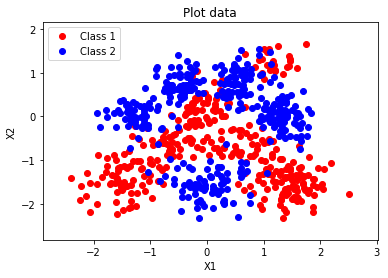

X_train has shape: (670, 2), y_train has shape: (670,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
# Visualize it just to be sure it is representative of the actual data set
plot_data(X_train,y_train)
print("X_train has shape: {}, y_train has shape: {}".format(X_train.shape, y_train.shape))

**e) Transform the pseudocode from the perperation exercise into python code**

In [7]:
# Define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def pad_bias(X):
    return np.append(np.ones((X.shape[0], 1)), X, axis = 1)

def logistic_regression(X_data, y_data, l_rate = 0.001, max_iter = 1000):
    
    loss = []
    
    # Add bias to training set
    X_data = pad_bias(X_data)
    
    # Initialize weights
    b = np.random.uniform(-1, 1, X_data.shape[1])

    for i in range (0, max_iter):
        # Compute sigmoid(Xb)
        y_pred = sigmoid(np.dot(X_data, b))
        
        # Compute log liklihood
        loss.append(compute_average_ll(X_data, y_data, b))
        
        # Weights update
        b = b + l_rate * np.dot(np.transpose(X_data), y_data-y_pred)
    return b, loss

In [29]:
def plot_ll_2(ll, ll2):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll2) + 0.1)
    ll2 = np.asarray(ll2)
    ax.plot(np.arange(1, len(ll) + 1), ll,'r-')
    ll2 = ll2.reshape(-1,len(ll)).mean(axis=1)
    ax.plot(np.arange(1, len(ll2) + 1), ll2,'b-')
    plt.legend(['Raw features', 'RBF features'], loc='upper left')
    plt.xlabel('Normalized Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

Report the average log likelihood after each training step

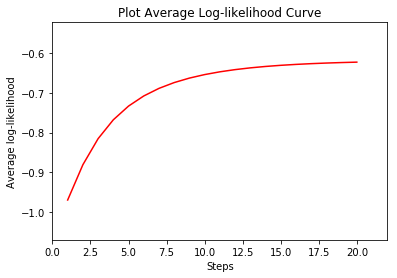

In [26]:
b, loss_array = logistic_regression(X_train, y_train, 0.001, max_iter = 20)
plot_ll(loss_array)

Visualise the predictions by adding probability contours to the plots made in part c)

(10000, 3)
(3,)
[0.52314645 0.52730548 0.53146072 ... 0.8023393  0.80497105 0.80757617]
(10000,)


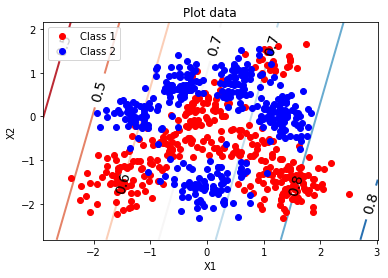

In [10]:
plot_predictive_distribution(X_train, y_train, b, predict_for_plot)

Two helper functions which return the predicted label for given input features and parameters, if *thresh* is set to a value, then for all probabilities above the threshold, the label returns 1, otherwise 0.

In [11]:
def predict_threshold(y_pred, thresh):
    y_pred[y_pred > thresh] = 1
    y_pred[y_pred <= thresh] = 0
    return y_pred

def predict_y(X_data, param, thresh = None):
    X_data = np.append(np.ones((X_data.shape[0], 1)), X_data, axis = 1)
    if thresh != None:
        return predict_threshold(sigmoid(np.dot(X_data, param)), thresh)
    else:
        return sigmoid(np.dot(X_data, param))

Report the final traning and test log-likelihoods per datapoint.

In [12]:
ll_train = compute_average_ll(pad_bias(X_train), y_train, b)
print("Final training log-likelihood: {}".format(ll_train))

ll_test = compute_average_ll(pad_bias(X_test), y_test, b)
print("Final test set log-likelihood: {}".format(ll_test))

Final training log-likelihood: -0.6197984639524095
Final test set log-likelihood: -0.6334981177086187


**f) For the test data, apply a threshold to the probabilistic predictions. Confusion matrix and f1 score are calculated**

In [13]:
y_pred = predict_y(X_test, b, 0.5)
c = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  
print("Test Set Confusion matrix: {}".format(c))
print("f1 score: {}".format(f1))

Test Set Confusion matrix: [[124  53]
 [ 41 112]]
f1 score: 0.7147743572768399


**g) Expand the inputs through a set of RBFs centred on the training datapoints**

In [241]:
def expand_inputs(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [242]:
rbf_kernel_size = 0.01
X_train_rbf = expand_inputs(rbf_kernel_size, X_train, X_train)

Train the logistic classification model on the feature expanded inputs and display the new predictions

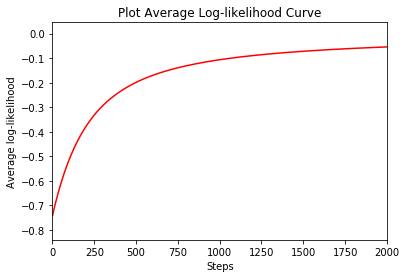

-0.054395056385722264

In [243]:
b_rbf, loss_array_rbf = logistic_regression(X_train_rbf, y_train, 0.01, max_iter = 2000)
plot_ll(loss_array_rbf)
loss_array_rbf[-1]

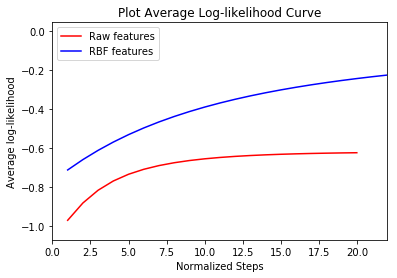

In [244]:
plot_ll_2(loss_array,loss_array_rbf)

In [175]:
def plot_predictive_distribution_expanded(X, y, b):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)),
                                yy.ravel().reshape((-1, 1))), 1)
    x_expanded = expand_inputs(rbf_kernel_size, X_predict, X_train)
    x_tilde = np.concatenate((x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    Z = logistic(np.dot(x_tilde, b))
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 5)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

Visualise the predictions using probability contours as in part e)

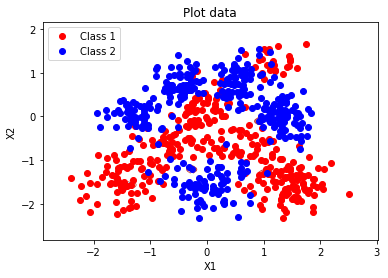

In [176]:
plot_predictive_distribution_expanded(X_train, y_train, b_rbf)

**h) Report the final training and test log-likelihoods per datapoint, the 2x2 confusion matricies are generated for rbf kernel size = {0.01, 0.1, 1}**

In [170]:
X_test_rbf = expand_inputs(rbf_kernel_size, X_test, X_train)
y_pred = predict_y(X_test_rbf, b_rbf, 0.5)
c = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  
print("Test set confusion matrix: {}, kernel size is {}".format(c, rbf_kernel_size))
print("f1 score: {}".format(f1))

Test set confusion matrix: [[161  16]
 [ 10 143]], kernel size is 1
f1 score: 0.9209770114942528


kerne = 0.001, f1: 0.410; kernel = 1, f1:0.909; kernel = 0.1, f1:0.896

In [245]:
def compute_average_ll_2(y, y_pred, w):
    return np.mean(y * np.log(y_pred)
                   + (1 - y) * np.log(1.0 - y_pred)) 

In [246]:
X_test_rbf = expand_inputs(rbf_kernel_size, X_test, X_train)
y_pred_test = predict_y(X_test_rbf, b_rbf)
y_pred_train = predict_y(X_train_rbf, b_rbf)
ll_train = compute_average_ll_2(y_train, y_pred_train, b_rbf)
ll_test_1 = compute_average_ll_2(y_test, y_pred_test, b_rbf)
print(ll_train)
print(ll_test_1)
y_pred = predict_y(X_test_rbf, b_rbf, 0.5)

c = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  
print("Test set confusion matrix: {}, kernel size is {}".format(c, rbf_kernel_size))
print("f1 score: {}".format(f1))

-0.054368314139921214
-0.6595165545885455
Test set confusion matrix: [[ 17 160]
 [  2 151]], kernel size is 0.01
f1 score: 0.4121657283603096
